# ⚡ Grupo 6 - UTEC 4Geeks BID 2022 ⚡
# PROYECTO FINAL

# Stroke Prediction 

## Introduction

Stroke happens when the blood supply to part of the brain is cut off. Without blood, brain cells can be damaged or die. Fast access to treatment saves lives and improves recovery.

There are many factors, including tobacco use, physical inactivity, unhealthy diet, harmful use of alcohol, atrial fibrillation, raised blood lipid levels, obesity, genetic disposition, stress and depression.

Stroke has already reached epidemic proportions. 1 in 4 of us will have a stroke in our lifetime. 

Ref: https://www.world-stroke.org/

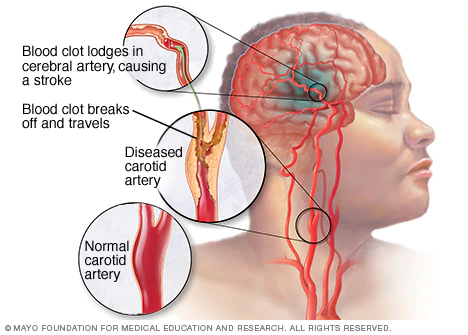

Stroke, a cerebrovascular disease, is one of the major causes of death. It causes significant health and financial burdens for both patients and health care systems. One of the important risk factors for stroke is health-related behavior, which is becoming an increasingly important focus of prevention. Many machine learning models have been built to predict the risk of stroke or to automatically diagnose stroke, using predictors such as lifestyle factors or radiological imaging. (Alanazi EM, Abdou A, Luo J. Predicting Risk of Stroke From Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models.
 (JMIR Form Res. 2021 Dec 2;5(12):e23440. doi: 10.2196/23440. PMID: 34860663; PMCID: PMC8686476.)

**In Uruguay**, stroke has a fundamental epidemiological importance: it is among the three leading causes of death at a general level and it is the leading cause of disability in adults. According to data published by the Commission for Cardiovascular Health, around 80 million people living in the world today have suffered a stroke and, consequently, more than 50 million survivors live with some type of permanent disability. Although life after a stroke is not the same in many cases, it is possible, with the right care and support, to continue with a good quality of life. CVAs are time-dependent, which means that it is essential to identify them as quickly as possible in order to establish the most appropriate treatment for the patient and prevent possible sequelae; they constitute one of the leading causes of disease burden worldwide and in Uruguay, measured in years of healthy life lost, an indicator that encompasses both mortality and disability caused by these diseases.

According to the latest data from the Ministry of Public Health, from December 2019, during 2018, 1,732 people died from stroke and 2,125 people from cerebrovascular causes in general. (https://um.edu.uy/noticias/el-acv-es-una-enfermedad-con-alta-incidencia-en-uruguay-y-el-mundo)



**Models can predict risk with high accuracy while maintaining a reasonable false positive rate.**

Stroke is the second leading cause of death worldwide. According to the World Health Organization [1], 5 million people worldwide suffer a stroke every year. Of these, one third die and another third are left permanently disabled. In the United States, someone has a stroke every 40 seconds and every four minutes, someone dies [2]. The aftermath is devastating, with victims experiencing a wide range of disabling symptoms including sudden paralysis, speech loss or blindness due to blood flow interruption in the brain [3]. The economic burden to the healthcare system in the United States amounts to about $34 billion per year in the US [4]. An additional $40 per year is spend on care for elderly stroke survivors [5]. 

([1]  Stroke, Cerebrovascular accident | Health topics – WHO EMRO

[2] Heart Disease and Stroke Statistics2020 Update: A Report From the …

[3] The science of stroke: Mechanisms in search of treatments

[4] American Heart Association Statistics Committee and Stroke Statisti…

[5] Care received by elderly US stroke survivors may be underestimated.)

**Problem Statement**

Study the relationships of several variables and Stroke and  predict the stroke probability with best model and hypertuned parameters.

*Our proyect  it's about make an aplication to screen healthy patients to know the degree of probability of suffering a stroke or not suffering it  to have more tools to design a personalized prevention plan for doctors.*




* Hypothesis

Does age has impact on strokes? 

Does body mass index and glucose levels in a person propel a stroke?

* Assumption
 
Smoking can induce Stroke, is it true? 

Have Heart Disease is prone to Stroke, is it true? 

Hypertensión could lead to Stroke, is it true? 




### Metadata
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not



**Studying the data dictionary our first conclusions is:
Contains some of the preconditions recognized worldwide as causes of the disease. Therar others tha we have no dates.**





In [118]:
!pip install --upgrade pip
!pip install pandas numpy seaborn plotly
!pip install sklearn
!pip install statsmodels
!pip install imblearn
!pip install pygal
!pip install autoviz
!pip install missingno
!pip install pywaffle
%matplotlib inline
!pip install lightgbm

# 1.1 Import Libraries and modules



In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import NearMiss
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier, ExtraTreesClassifier

import missingno as msno
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', context='notebook')

import re
import string
import time

#visulaization modules
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

from pywaffle import Waffle
init_notebook_mode(connected= True)


#Common model helpers
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)


# dimensionality reduction
from sklearn.decomposition import PCA

import pylab as pl

# imbalance dataset handling

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)




# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [120]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [121]:
sns.set(rc={'figure.figsize': (8, 6)})
plt.style.use('fivethirtyeight')

Text(-0.75, -0.64, 'Mostly same colors will be used for throughout this notebook.')

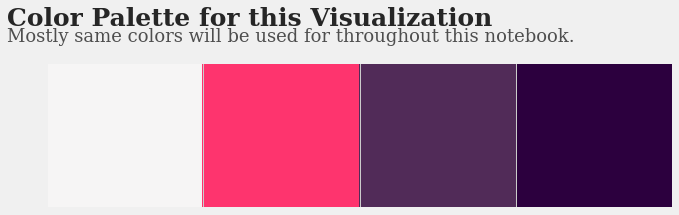

In [122]:
# color palette for visualizations
colors = ['#f6f5f5','#fe346e','#512b58','#2c003e']
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'font':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'Mostly same colors will be used for throughout this notebook.', {'font':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)


In [123]:
# para usar en drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load the dataset  

The information was downloaded from the Kaggle site.
 https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset because we did not find Uruguayan public data about stroke.


In [124]:

df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')


In [125]:
#usamos este en el drive compartido
#df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/healthcare-dataset-stroke-data.csv')

In [126]:
#usamos este en el drive compartido
#df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/healthcare-dataset-stroke-data.csv')

## 1.2 Data Preprocessing

**Get basic info**



In [127]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [128]:
df_raw.isnull().sum().to_frame(name="Missing values").sort_values(by="Missing values", ascending=False).style.background_gradient(cmap='Reds')

,Missing values
bmi,201
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0


## Initial Insights About Dataset

- We have 12 columns with 5110 observations.
- There are  categorical and numerical features.

    Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status

    Binary Numerical Features: hypertension,heart_disease, stroke
    
    Continous Numerical Features: age, avg_glucose_level, bmi

- Missing value in bmi.



**Studie duplicates**

In [129]:
df_duplicates = df_raw['id'].duplicated().sum()
df_duplicates

print("Theres is not duplicated observation")

Theres is not duplicated observation


In [130]:
df_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 **Stroke**
See amount of value of our target 



In [131]:
df_raw['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

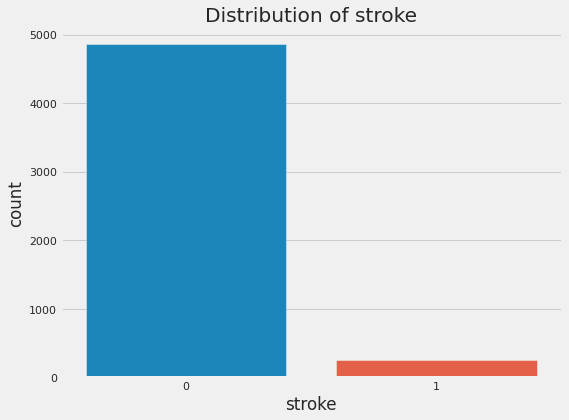

In [132]:
sns.countplot(x=df_raw['stroke'])
plt.title('Distribution of stroke')
plt.show()

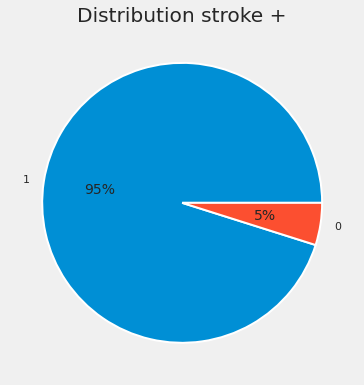

In [133]:
plt.figure(figsize=(8, 6))
plt.pie(df_raw["stroke"].value_counts().values, labels=df_raw["stroke"].unique(), autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Distribution stroke +")
plt.show()

**Note: We  have a highly unbalanced data distribution**

      From distribution it is clear that every 5 patient out of 100 patient are  stroke +.

An obvious case is in the Health area where we usually find data sets with thousands of records with “negative” patients and a few positive cases, that is, those who suffer from the disease we want to classify.

A highly unbalanced data distribution, and null accuracy score of this distribution it self is 95%, which imploys any dump model should randomly predictions of stroke could reach accuracy of 95%. So, while modeling and training data, either over sampling or under sampling has to be done to obtain best results.

     If we measure the effectiveness of our model by the number of hits it had, only taking into account the majority class we may be having a false feeling that the model works well.

We have four possible cases for each class:

- High precision and high recall: the model perfectly handles that class
- High precision and low recall: the model does not detect the class very well, but when it does, it is highly reliable.
- Low precision and high recall: The class detects the class well but also includes samples from other classes.
- Low precision and low recall: The model fails to classify the class correctly.

When we have a dataset with imbalance, it usually happens that we obtain a high precision value in the Majority class and a low recall in the Minority class.




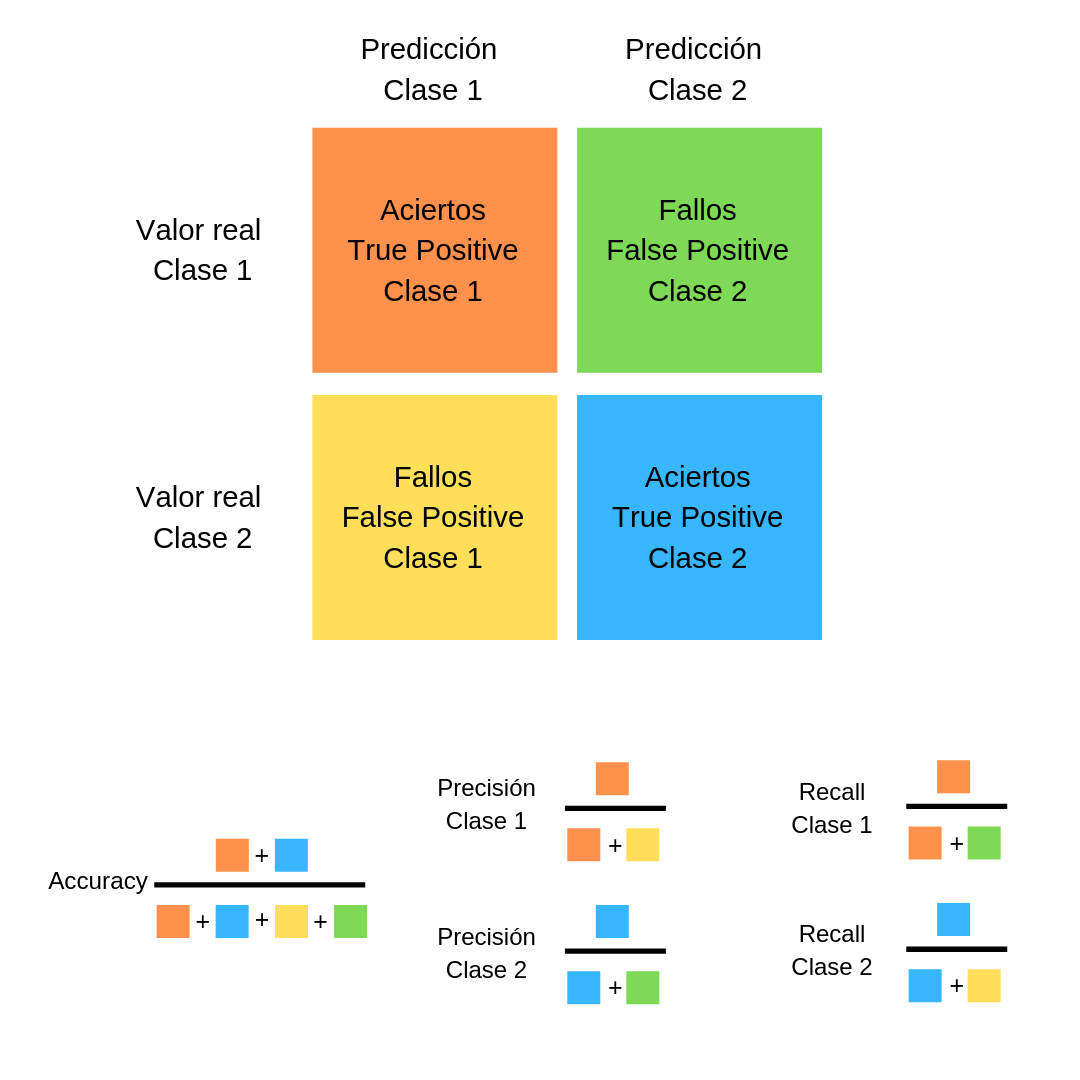

***There are several strategies for working with unbalanced datasets that we will discuss later.***

## Distribution of Targets

We must bear in mind that the variables by itself is not enough to predict the likely hood of getting a stroke.


* 1- Categorical variables

**Gender**

<AxesSubplot:>

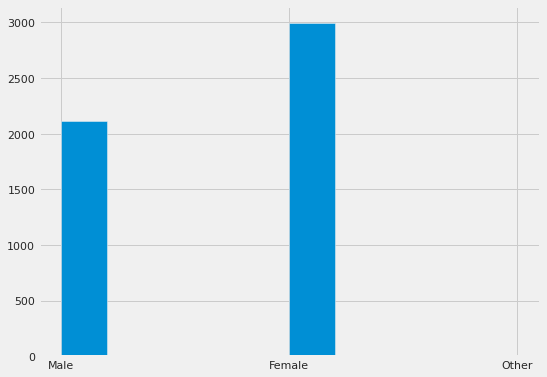

In [134]:
df_raw.gender.hist()

* The number of Female gender  is more than the number of Male gender .

***Residence_Type***  

1.   Urban
2.   Rural



In [135]:
df_raw['Residence_type'].value_counts()




Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:>

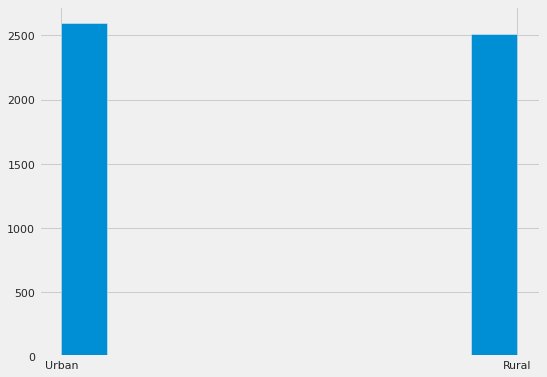

In [136]:
df_raw.Residence_type.hist()

* It is similar amount in  both Residence_type

***Ever_married***

*   Yes
*   No



In [137]:
df_raw['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:>

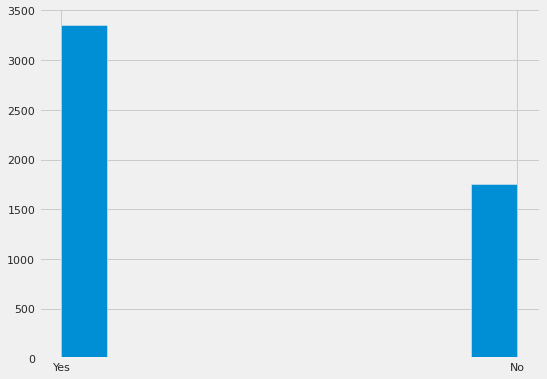

In [138]:
df_raw.ever_married.hist()

* Most of the patients are married in our dataset.
 

***Work_Type***

*   Private
*   Govt_job
*   Self-employed
*   children
*   Never_worked



In [139]:
df_raw['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:>

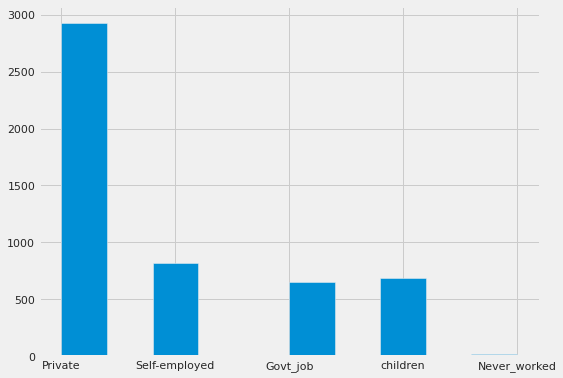

In [140]:
df_raw.work_type.hist()

* We have a noticeable majority of private workers over the others work_type. 

***smoking_status***
 * never_smoked
 * fromerly smoked
 * smokes
 * Unknown


    "formerly smoked": An adult who has smoked in his or her lifetime but who had quit smoking at the time of interview.
    "Unknown": not have data about this patients


In [141]:
df_raw['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

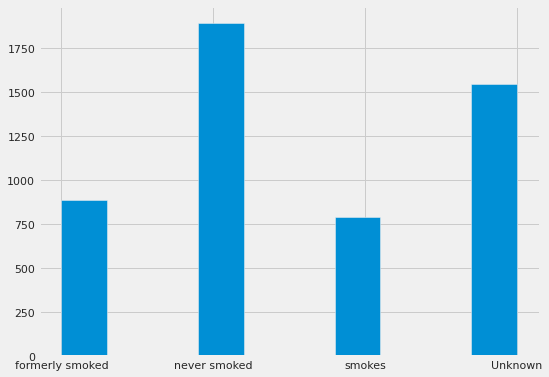

In [142]:
df_raw.smoking_status.hist()
plt.show()


* We have most observations that never smoked

In [143]:
#df_raw.drop(["id"],axis=1,inplace=True)

In [144]:
#df_raw.hist(figsize=(8,8))
#plt.show()

***hypertension***

Blood pressure is the force exerted by circulating blood against the walls of the body’s arteries, the major blood vessels in the body. Hypertension is when blood pressure is too high.




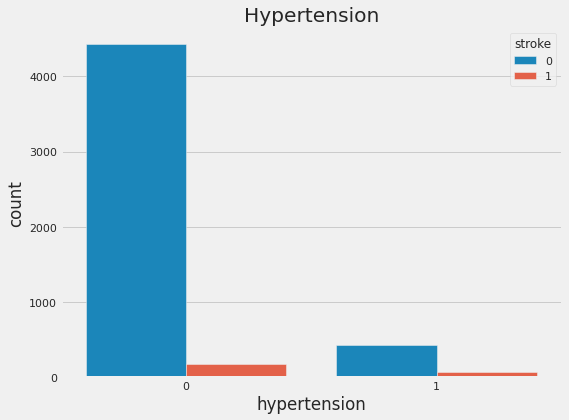

In [145]:
sns.countplot(x=df_raw['hypertension'],hue=df_raw['stroke'])   
plt.title('Hypertension')
plt.show()

In [146]:
df_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Age: The average age  is 43 in the dataset. We must study the age distribution. We have read that most studies are carried out on populations > 35 years. **We can see that we have an older adult population bias.** 

Hypertension and Heart desease: Most observation  do not have deviations in Hypertension and heart_disease. The average of hypertension column and heart_disease column is significantly lower than 0.5 (average of 0,1). That means that hardly any of the patients suffer from those in the our dataset.

Average Glucose: The  level is around 100 which can be considered healthy as well.
75% Glucose values ​​on average are within the normal range, however we have high maximum values (271 mg/dl). 

BMI: There are some Null values in the bmi column. **Regarding bmi values, we can conclude that we have a mostly obese population, which could lead us to biased information.**

Stroke: Has 1 as its max value and 0 as its min, 25th, 50th, and 75th percentile value. That means, mostly all the values in the column are 0.


* 2- Numeric variables

In [147]:
## binning of numerical variables

#df_raw['bmi_cat'] = pd.cut(df_raw['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
#df_raw['age_cat'] = pd.cut(df_raw['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
#df_raw['glucose_cat'] = pd.cut(df_raw['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

***avg_glocose_level***
Glycemia is the concentration of glucose or sugar in the blood, coming from food, especially carbohydrates. "average glucose" is a way of translating A1C test results into terms that closely represent daily glucose readings. It was introduced by the American Diabetes Association (ADA) in 2010 to help people with diabetes better understand how their A1C results compare to their daily glucose readings.

The eAG is determined using a straightforward mathematical formula that converts percentage of glycated hemoglobin as determined by an A1C test into the unit you're used to seeing on your glucometer: mg/dL: 28.7 X A1C – 46.7 = eAG.

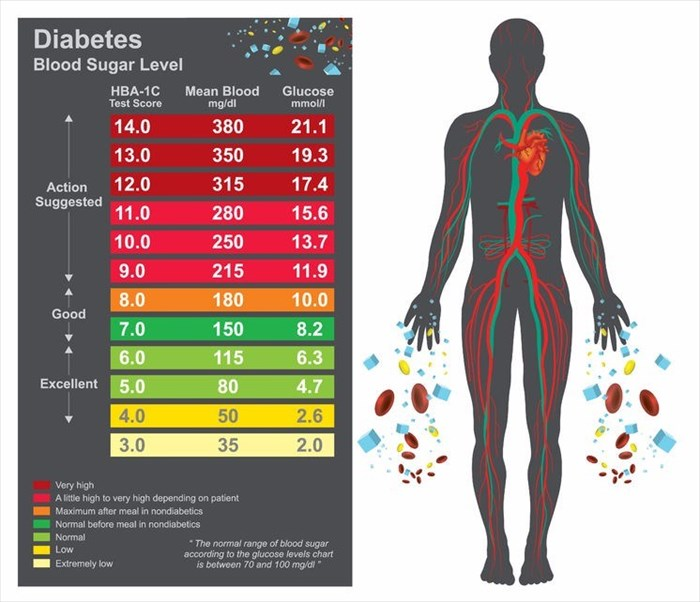

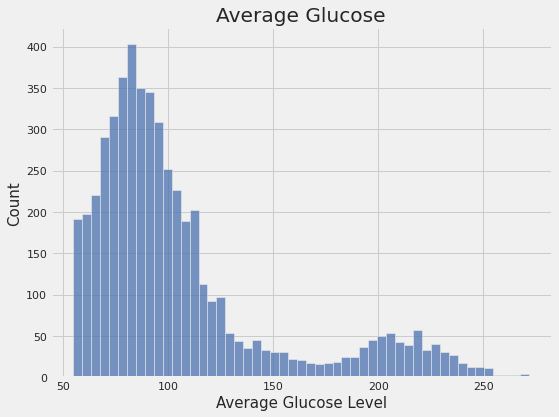

In [148]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df_raw, x="avg_glucose_level")  #, hue="stroke"
plt.xlabel("Average Glucose Level", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title('Average Glucose')
plt.show()

***BMI:***

Body mass index (BMI) is a person's ***weight in kilograms*** divided by the ***square of height in meters***. BMI is an easy and inexpensive screening method for weight category: underweight, healthy weight, overweight, and obesity.
The bmi is a parameter that is widely used to assess the nutritional status of a person, since it correlates 80% with body fat and, together with other anthropometric measurements, can bring us closer to the diagnosis of overweight or obesity.

It is known that in adults the normal or healthy BMI is between 18 and 25, however, these normal values ​​can vary over the years. Therefore, below we present a table where the normality of the BMI according to age is presented.

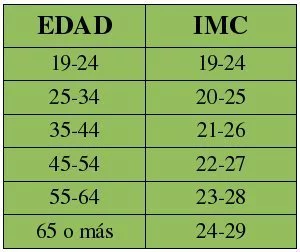


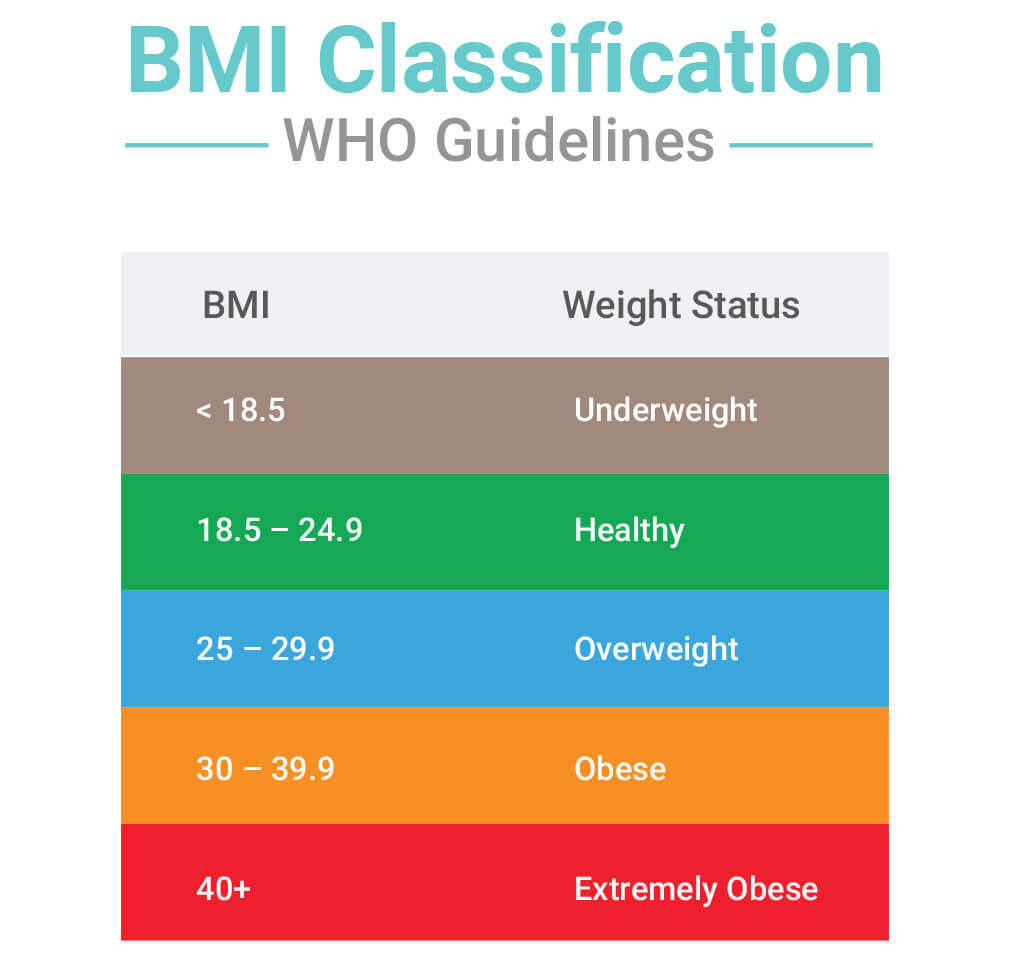

<AxesSubplot:>

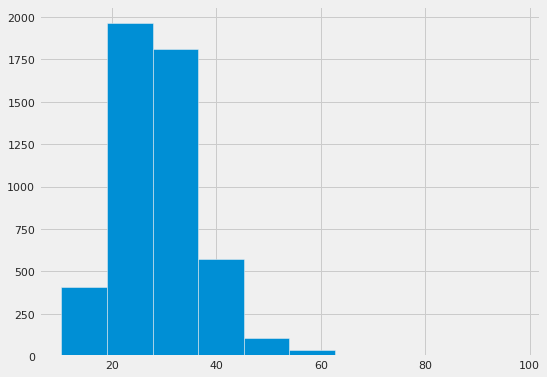

In [149]:
df_raw.bmi.hist()

* We have study the proportion of bmi

**Gender**

AttributeError: 'Text' object has no property 'Size'

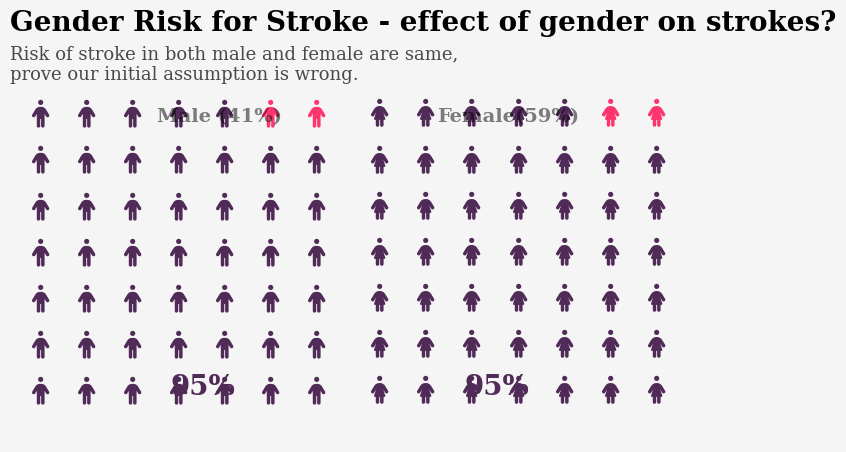

In [150]:
stroke_gen = df_raw[df_raw['stroke'] == 1]['gender'].value_counts()
healthy_gen = df_raw[df_raw['stroke'] == 0]['gender'].value_counts()

female = df_raw['gender'].value_counts().values[0]
male =  df_raw['gender'].value_counts().values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#f6f5f5',dpi = 100,
                 
                 plots = {121:
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : ['#512b58','#fe346e'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : ['#512b58','#fe346e'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)
#fig.text ('asdfasdfasd0', {'font':'Serif', 'size':35, 'color':'black'} )


fig.text(0., 0.8, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.73, 'Risk of stroke in both male and female are same,\nprove our initial assumption is wrong. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#f6f5f5'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#f6f5f5'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#512b58'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#512b58'}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'},alpha = 1)


fig.show()

**Age** 

<AxesSubplot:>

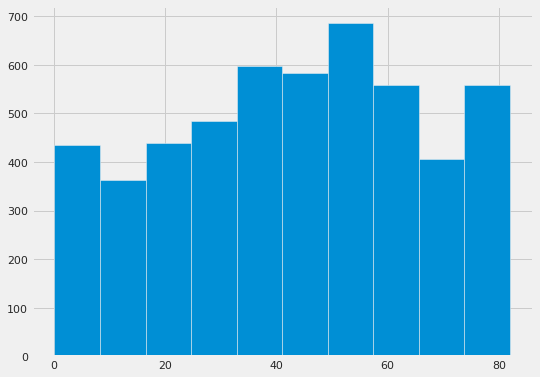

In [151]:
df_raw.age.hist()

In [152]:
df_raw['age_cat'] = pd.cut(df_raw['age'], bins = [0,13,21, 45,65,75,105], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly','Elderly older adults'])

In [153]:
def age_cohort(age):
    if   age >= 0 and age < 12:
        return "Children"
    elif age >= 12 and age < 21:
        return "Teens"
    elif age >= 21 and age < 45:
        return "Adults"
    elif age >= 45 and age < 65:
        return "Mid Adults"
    elif age >= 65 and age < 75:
        return "Elderly"
    elif age >= 75 :
        return "Elderly older adult"   

Adults                  1546
Mid Adults              1527
Children                 645
Elderly                  500
Elderly older adults     465
Teens                    427
Name: age_cat, dtype: int64


Text(0, 0.5, 'Count stroke +')

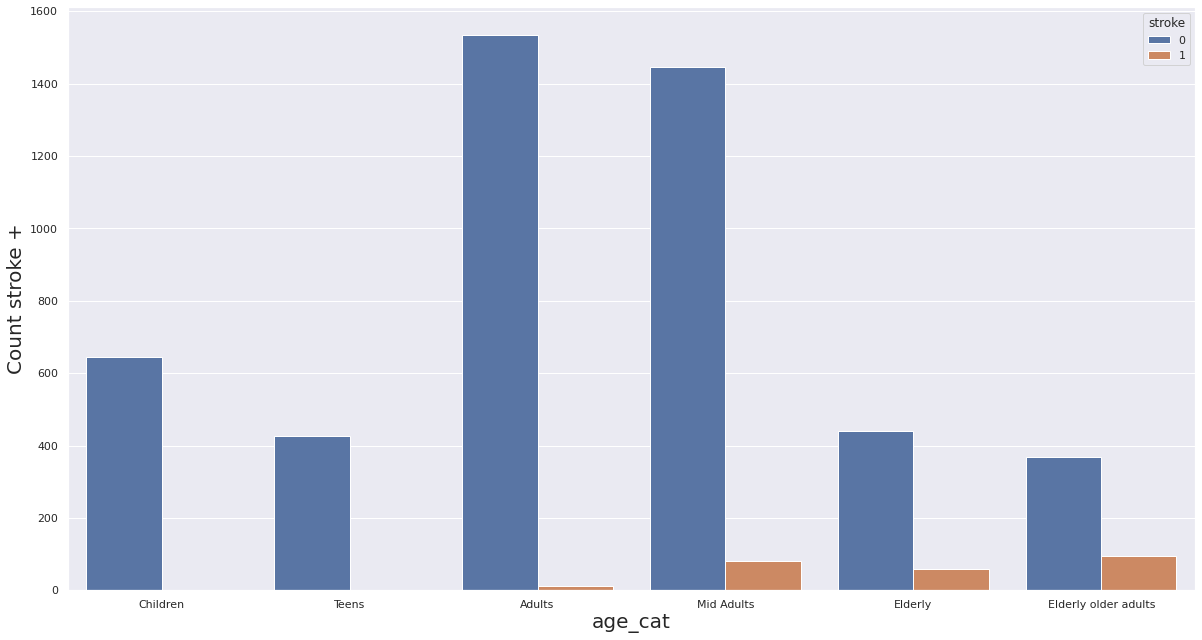

In [154]:
print(df_raw['age_cat'].value_counts())
sns.set(rc={'figure.figsize':(18,10)})
seaborn_plot = sns.countplot(df_raw['age_cat'], hue = df_raw['stroke'])
seaborn_plot.set_xlabel("age_cat",fontsize=20)
seaborn_plot.set_ylabel("Count stroke +",fontsize=20)

In [155]:
df_raw[(df_raw['age']<45)]['stroke'].value_counts()

0    2523
1      10
Name: stroke, dtype: int64

In [156]:
df_raw[(df_raw['age']>44) & (df_raw['age']<66)]['stroke'].value_counts()

0    1529
1      83
Name: stroke, dtype: int64

In [157]:
df_raw[(df_raw['age']>65) ]['stroke'].value_counts()

0    809
1    156
Name: stroke, dtype: int64

In [158]:
#df_filter_age35 = df_raw[df_raw['age']>35]
#df_filter_age35['stroke'].value_counts()

**We have read that most studies are carried out on populations > 35 years, so in the first instance we decided to remove those under 35 years of age but working the model we conclude that is better not remove them**


In [159]:
df_raw['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Age is an important feature. Age feature distribution is not a normal distribution, which needs to be tranformed later. 
From catergorical features it can be seen that old age people are mostly having strokes, compared to younger ones.


**BMI Studie of the missing values**



In [160]:
df_raw[df_raw['bmi'].isna()].shape

(201, 13)

Showing records where patient suffered from stroke but had missing value in bmi attribute.

In [161]:
df_raw[df_raw['bmi'].isna() & df_raw['stroke'] == 1].shape


(40, 13)

**We have 201 records were listed as NaN (not a number) in the BMI column. The first thought was to remove them since they represented a small fraction of the dataset. Nevertheless, by probing further, it contained 40 records where patients suffered a stroke. This information was valuable considering the fact that only 249 patients suffered a stroke in all  dataset.**


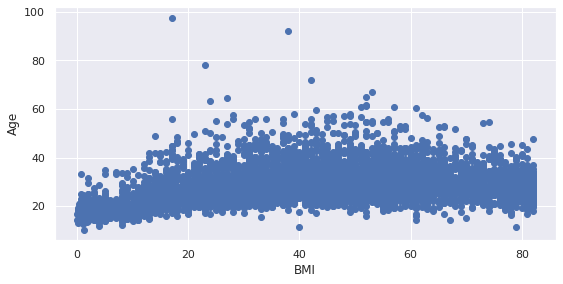

In [162]:
plt.figure(figsize = (8, 4))
plt.scatter(y=df_raw['bmi'], x=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

In [163]:
df_raw[df_raw['bmi']<19].shape

(404, 13)

In [164]:
df_raw[(df_raw['bmi']>= 19) & (df_raw['bmi']< 25)].shape

(1176, 13)

In [165]:
df_raw[(df_raw['bmi']>= 25) & (df_raw['bmi']< 30)].shape

(1409, 13)

In [166]:
df_raw[(df_raw['bmi']>= 30) & (df_raw['bmi']< 40)].shape

(1506, 13)

In [167]:
df_raw[df_raw['bmi']>= 40] .shape

(414, 13)

**Resume Preview of BMI dataset:**
-  201 missing value
-  404 observation whith underweight
- 1176 observation whith healthy weight
- 1409 observation whith overweight
- 1506 observation are obese
-  414 observation are extremely obese 

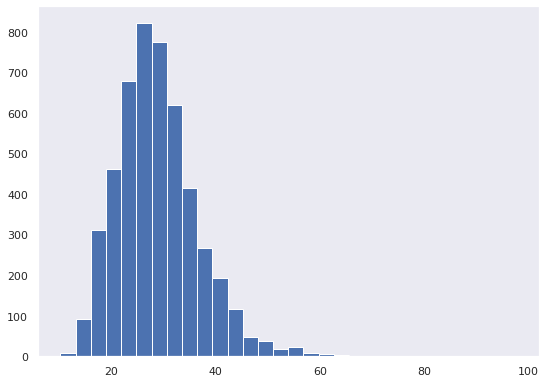

In [168]:
df_raw['bmi'].hist(bins=30,figsize=(8, 6),grid=False);
plt.show()

**The are same outliers of bmi**

**Studie of missing BMI**

Missing values ​​are present in most of the data sets we work with in our day to day. They are those in which no data value is stored in an observation. It is of vital importance to identify and deal with, for example, by imputation, these values ​​in order to continue with our analysis or training of the machine learning model.


Given the observations we have, we know that it is not feasible to output the observations with MBI null. That is why we must define what technique to use to complete those values.

1- The first technique consists of filling these values ​​with the mean (or median) of the data of the variable in the case that it is a numerical variable. For the case of categorical variables, we impute the missing values ​​with the mode of the variable.

2- Another more advanced technique consists of the use of predictive models to estimate missing values. A very popular non-parametric model for these cases is the k-nearest neighbors model, where the missing value is estimated as the mean (in the case of numerical variables) of the values ​​of the k closest neighbors or observations. Likewise, for categorical variables, the majority class of the closest k is used (KNN).
La librería scikit-learn nos proporciona la clase KNNImputer para hacer uso de este modelo en la imputación de missing values. Esta clase usa por defecto la distancia euclidiana, pero podemos elegir la que prefiramos modificando el parámetro metric. Asimismo, también podemos elegir el número de vecinos con el argumento n_neighbors y en esta ocasión usaremos 5. Podeís ver en el siguiente código como utilizamos este método para imputar los valores perdidos en la variable normalized-losses.

3-  Decision Tree to predict the missing BMI




In [170]:
# to have the state of bmi according of literature read.
#Hacer un histograma con BMI para mostrar la distribución 

def bmi_cohort(bmi):
    if   bmi >= 1 and bmi <= 18:
        return "underweight "
    elif bmi > 18 and bmi <= 24:
        return "healthy"
    elif bmi > 25 and bmi <= 29:
        return "overweight"
    elif bmi > 30 and bmi <= 39:
        return "obese"
    elif bmi > 40:
        return "extremely obese"

In [171]:
df_copy = df_raw.copy()
df_copy['bmi_group'] = df_copy['bmi'].apply(bmi_cohort)
df_copy.sort_values('bmi_group', inplace = True)

**We read that bmi is related to age. According to the graph found, we observe that the intervals are 5 years.
We define bins of 5 years starting at 35. 
We assign to the null values ​​of bmi the mean of the bins to which the observation corresponds.
Let show step by step.**

In [173]:
# Same labels as yours
labels = ['<34','35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +']

# Define the edges between bins
bins = [0,35, 45, 55, 65, np.inf]

# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
#df_raw
 

In [174]:
df_raw['bmi_new'] = df_raw.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw[df_raw['bmi'].isna()].sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat,age_bins,bmi_new
2541,61252,Male,79.00,0,1,Yes,Private,Rural,82.27,NaN,never smoked,0,Elderly older adults,65 - +,29.557083
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,Mid Adults,55 - 64.9,31.343135
2192,26084,Female,77.00,1,0,Yes,Self-employed,Urban,109.51,NaN,never smoked,0,Elderly older adults,65 - +,29.557083
3705,11658,Male,1.08,0,0,No,children,Rural,74.50,NaN,Unknown,0,Children,<34,25.425751
1293,68003,Male,46.00,1,0,Yes,Private,Rural,73.72,NaN,smokes,0,Mid Adults,45 - 54.9,31.760649
105,2346,Male,58.00,0,0,Yes,Private,Urban,82.30,NaN,smokes,1,Mid Adults,55 - 64.9,31.343135
2788,2013,Male,14.00,0,0,No,Private,Rural,110.72,NaN,never smoked,0,Teens,<34,25.425751
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Mid Adults,55 - 64.9,31.343135
161,16590,Male,71.00,0,1,Yes,Private,Urban,81.76,NaN,smokes,1,Elderly,65 - +,29.557083
70,70676,Female,76.00,0,0,Yes,Govt_job,Rural,62.57,NaN,formerly smoked,1,Elderly older adults,65 - +,29.557083


In [175]:
df_raw.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat,age_bins,bmi_new
3832,64662,Female,23.0,0,0,No,Private,Rural,58.01,35.3,never smoked,0,Adults,<34,35.3
4857,27922,Male,32.0,0,0,Yes,Private,Rural,102.13,32.3,never smoked,0,Adults,<34,32.3
3583,35155,Female,50.0,0,0,Yes,Self-employed,Urban,69.92,18.7,formerly smoked,0,Mid Adults,45 - 54.9,18.7
4985,37431,Female,39.0,0,0,Yes,Govt_job,Urban,109.03,24.9,Unknown,0,Adults,35 - 44.9,24.9
2755,35106,Male,3.0,0,0,No,children,Urban,88.43,17.7,Unknown,0,Children,<34,17.7
4136,23439,Male,63.0,0,1,No,Private,Urban,75.00,25.7,smokes,0,Mid Adults,55 - 64.9,25.7
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,Adults,<34,22.4
2077,53399,Male,74.0,0,0,Yes,Private,Rural,65.28,28.2,never smoked,0,Elderly,65 - +,28.2
3414,60249,Male,13.0,0,0,No,Private,Urban,141.09,24.0,Unknown,0,Children,<34,24.0
3253,50001,Female,34.0,0,0,Yes,Govt_job,Rural,86.36,32.1,smokes,0,Adults,<34,32.1


In [176]:
df_raw[df_raw['bmi'].isna()].shape

(201, 15)

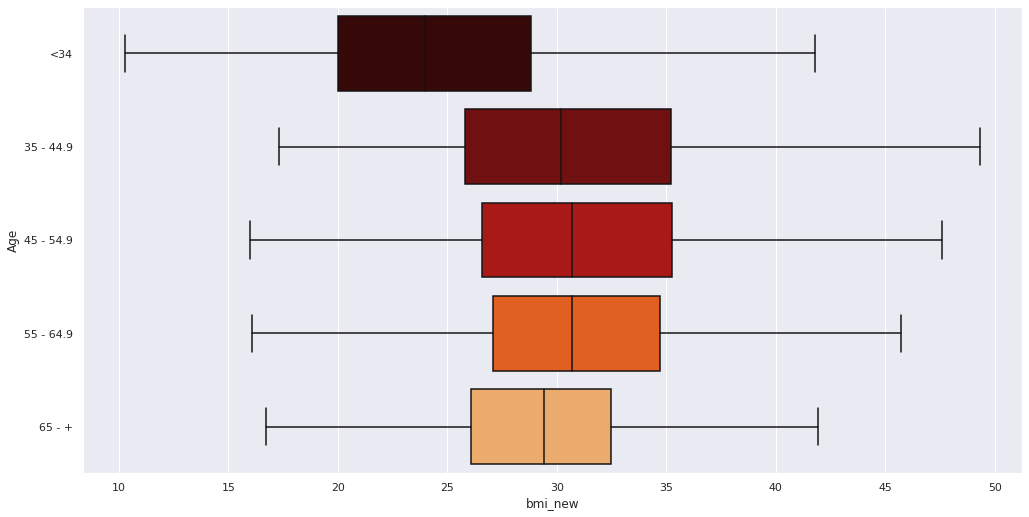

In [177]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = df_raw.age_bins, x = df_raw.bmi_new, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Age') 
plt.show()

With this graph we observe that the behavior of the age/bmi ranges is the same as the graph that we mentioned at the beginning of this task.

**Change bmi null by mean of all bmi value**

In [ ]:
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)


In [ ]:
df_raw[df_raw['bmi'].isna()].shape

(0, 15)

**Now we have all BMI whith values.**

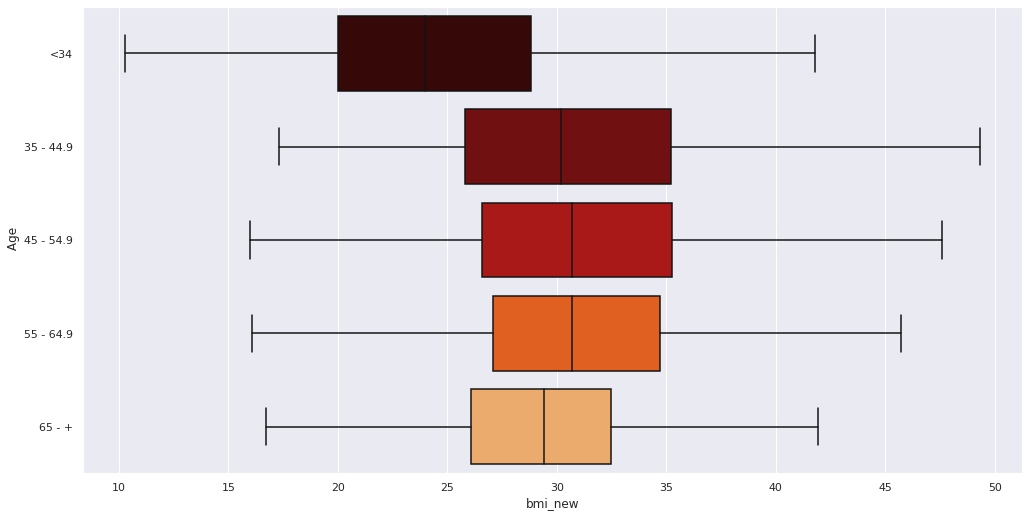

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = df_raw.age_bins, x = df_raw.bmi_new, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel(' Age') 
plt.show()

In [ ]:
def bmi_cohort(bmi):
    if   bmi >= 0 and bmi <= 18:
        return "underweight "
    elif bmi > 18 and bmi <= 24:
        return "healthy"
    elif bmi > 25 and bmi <= 29:
        return "overweight"
    elif bmi > 30 and bmi <= 39:
        return "obese"
    elif bmi > 40:
        return "extremely obese"

In [ ]:
df_copy = df_raw.copy()
df_copy['bmi_type'] = df_copy['bmi'].apply(bmi_cohort)
df_copy.sort_values('bmi_type', inplace = True)

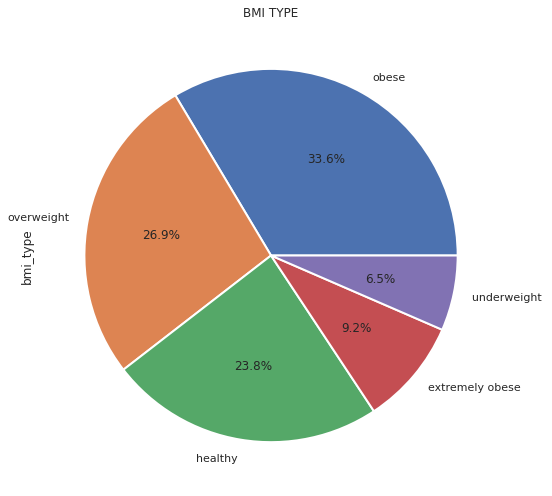

In [ ]:
plt.figure(figsize=(12,8))
df_copy.bmi_type.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("BMI TYPE")
plt.show()

In [ ]:
df_copy['bmi_type'].value_counts()

obese              1490
overweight         1194
healthy            1057
extremely obese     408
underweight         289
Name: bmi_type, dtype: int64

**Resume BMI after filling missing data:**
-  404 underweight
- 1056 healthy 
- 1194 overweight
- 1490 obese
-  408 extremely obese 

In [ ]:
df_raw.drop(["age_bins","bmi_new"],axis=1,inplace=True)

**Transform if needed**

In this dataset, there are 3 numerical attributes, age, average glucose level and bmi. Let’s normalize them to ensure that they have equal weightage when building a classifier. Noted that new columns were created rather than replacing the initial columns. This preserved the original data.

In [ ]:
df_raw.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
294,34974,Female,22.00,0,0,No,Private,Rural,79.81,27.7,Unknown,0,Adults
4517,68789,Female,28.00,0,0,No,Private,Urban,62.44,37.2,Unknown,0,Adults
99,4639,Female,69.00,0,0,Yes,Govt_job,Urban,82.81,28.0,never smoked,1,Elderly
425,6107,Female,5.00,0,0,No,children,Urban,77.88,13.8,Unknown,0,Children
3610,57219,Female,1.64,0,0,No,children,Rural,82.49,15.1,Unknown,0,Children
1520,17860,Male,56.00,0,0,Yes,Private,Rural,97.50,36.3,formerly smoked,0,Mid Adults
3296,64742,Male,48.00,0,0,No,Self-employed,Rural,64.18,32.1,never smoked,0,Mid Adults
2019,66546,Female,20.00,0,0,No,Private,Urban,80.08,25.1,never smoked,0,Teens
2129,39531,Male,50.00,1,0,Yes,Private,Rural,220.36,40.9,formerly smoked,0,Mid Adults
1237,16449,Female,33.00,0,0,Yes,Govt_job,Rural,76.66,24.8,never smoked,0,Adults


<AxesSubplot:>

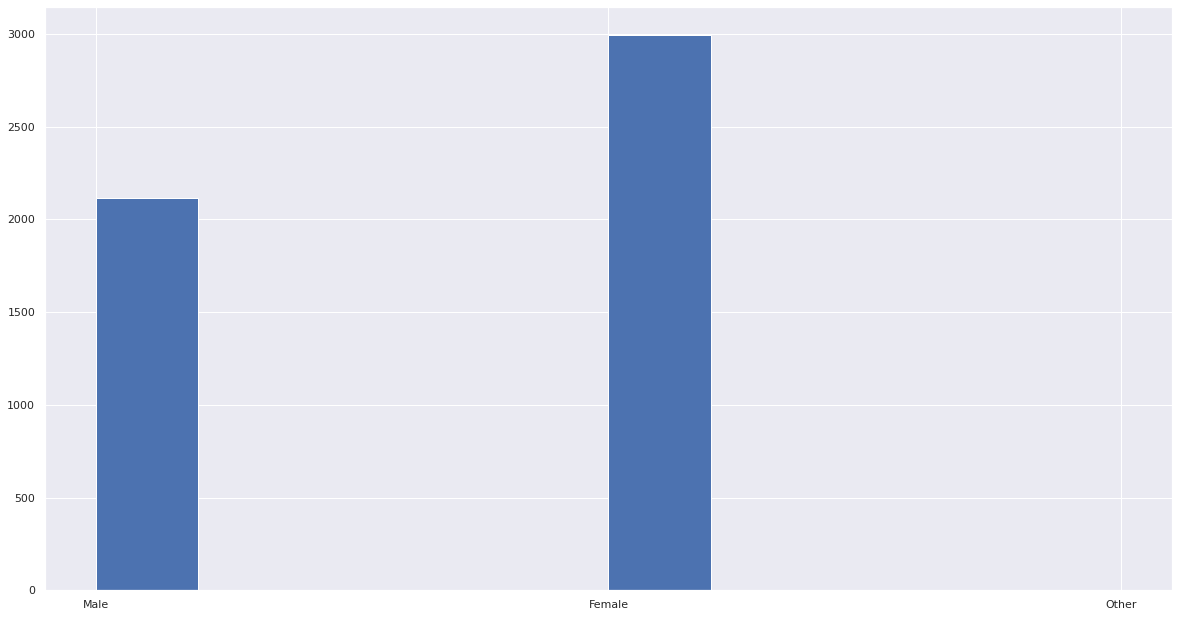

In [ ]:
df_raw.gender.hist()

In [ ]:
#set age as int
df_raw['age']=df_raw['age'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'].astype(int)

# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status'].astype(int)



0       3
1       1
2       1
3       2
4       1
5       3
6       1
7       1
8       0
9       0
10      1
11      2
12      2
13      0
14      1
15      1
16      2
17      2
18      1
19      0
20      2
21      1
22      1
23      0
24      3
25      1
26      3
27      0
28      2
29      3
30      2
31      0
32      1
33      3
34      1
35      3
36      3
37      3
38      0
39      1
40      3
41      1
42      2
43      3
44      2
45      1
46      0
47      3
48      1
49      2
50      0
51      3
52      1
53      1
54      1
55      3
56      1
57      3
58      1
59      1
60      3
61      1
62      2
63      3
64      0
65      1
66      1
67      0
68      3
69      1
70      3
71      3
72      3
73      1
74      1
75      3
76      1
77      3
78      1
79      0
80      0
81      0
82      1
83      1
84      0
85      2
86      2
87      3
88      3
89      0
90      1
91      1
92      1
93      0
94      1
95      1
96      3
97      2
98      3
99      1


In [ ]:
df_raw.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
4219,64670,1,55,0,0,Yes,Govt_job,Urban,71.79,43.000000,3,0,Mid Adults
3689,29326,1,75,0,0,Yes,Self-employed,Rural,70.22,24.800000,3,0,Elderly
2692,35123,1,1,0,0,No,children,Urban,84.20,19.200000,0,0,Children
4933,8690,1,81,0,0,Yes,Private,Urban,80.44,32.200000,1,0,Elderly older adults
876,19742,1,37,0,0,Yes,Private,Urban,106.35,29.700000,1,0,Adults
3808,10055,1,37,0,0,No,Govt_job,Rural,72.08,31.333433,3,0,Adults
475,38165,1,81,0,0,No,Private,Rural,69.01,32.600000,1,0,Elderly older adults
842,10792,1,23,0,0,No,Private,Rural,79.13,32.900000,3,0,Adults
2711,25095,0,44,0,0,Yes,Govt_job,Urban,94.76,26.000000,3,0,Adults
3488,57968,1,11,0,0,No,children,Urban,107.18,27.600000,0,0,Children


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   int64   
 2   age                5110 non-null   int64   
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   int64   
 11  stroke             5110 non-null   int64   
 12  age_cat            5110 non-null   category
dtypes: category(1), float64(2), int64(7), object(3)
memory usage: 484.4+ KB


## Let see the  categorical variables

In [ ]:
variables = [variable for variable in df_raw.columns if variable not in ['id','stroke']]
conts = ['age','avg_glucose_level','bmi']

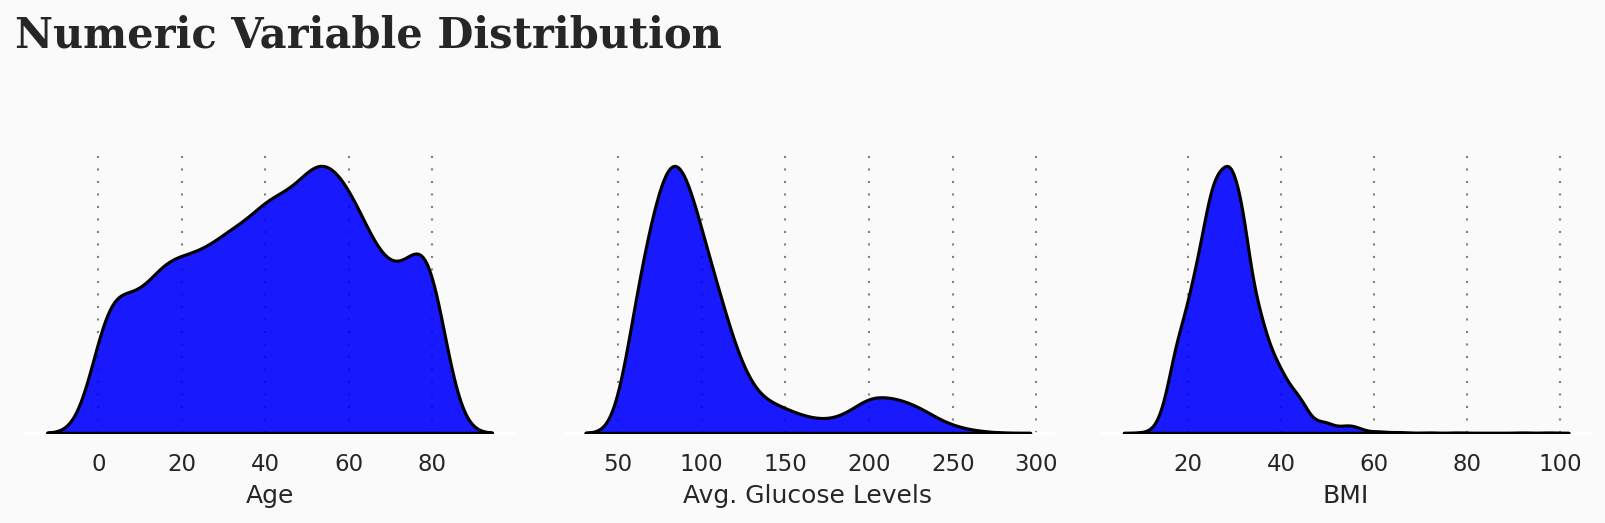

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df_raw[variable] ,ax=locals()["ax"+str(plot)], color='blue', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.023, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')


plt.show()

Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.

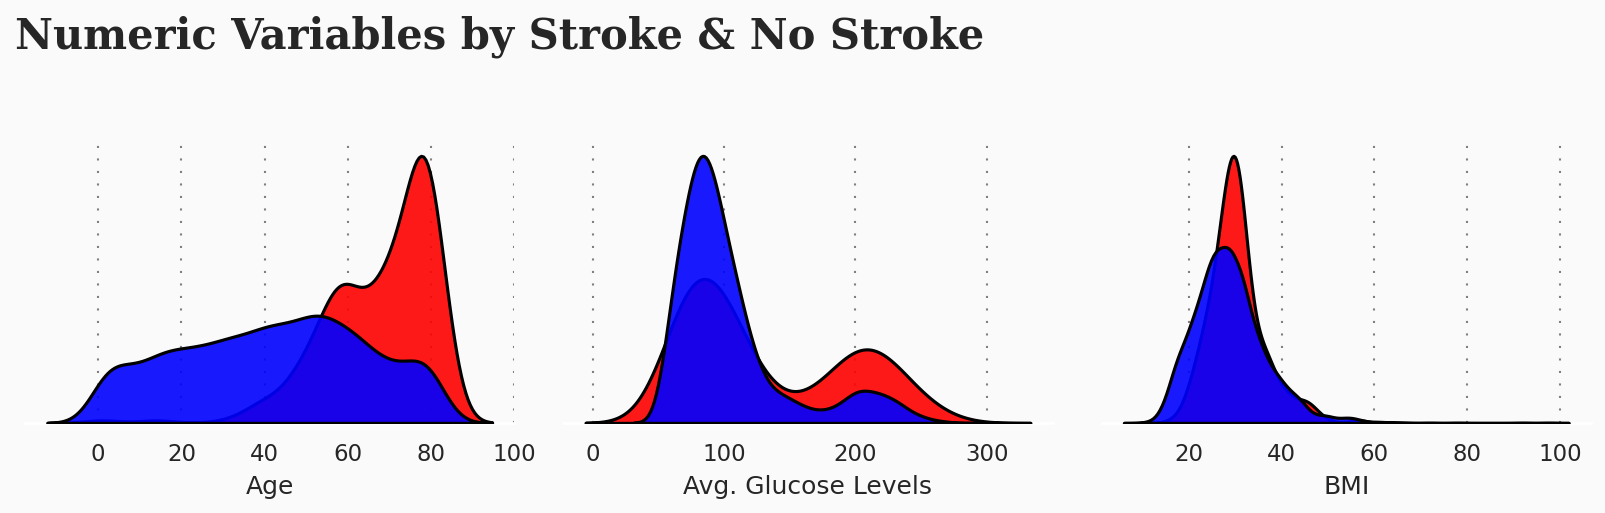

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df_raw[df_raw['stroke'] == 1]
ns = df_raw[df_raw['stroke'] == 0]
##0f4c81
##9bb7d4
for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='red', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='blue', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
#ax3.set_xlabel('Gender')

        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()

**We can see that  the distribution of age  is different for those that have strokes, and those that do not.**
The others numerical variables have the same distribution.


In [ ]:
#Let's check the categories in each of our object type features

def countplot_features(feature):
    plot=sns.countplot(x=feature,data=df_raw)
    plt.show()

def countplot_targetvsfeature(data, feature,y):
    fig = plt.figure(figsize=(20,5))
    plot=sns.countplot(x=feature,data=data,hue=y)
    plt.show()  

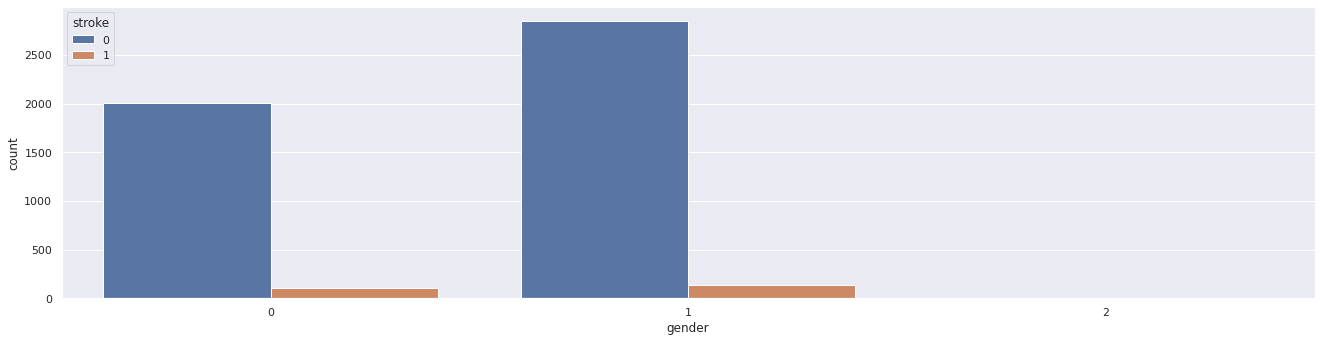

In [ ]:
countplot_targetvsfeature(df_raw,'gender','stroke')

The number of Female gender patients is more than the number of Male gender patients and also Female has more stroke + than Male.


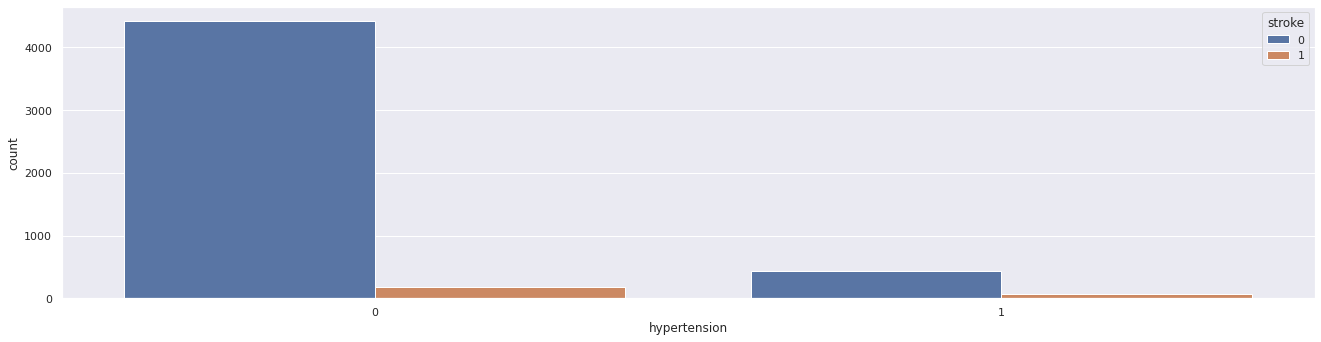

In [ ]:
countplot_targetvsfeature(df_raw,'hypertension','stroke')


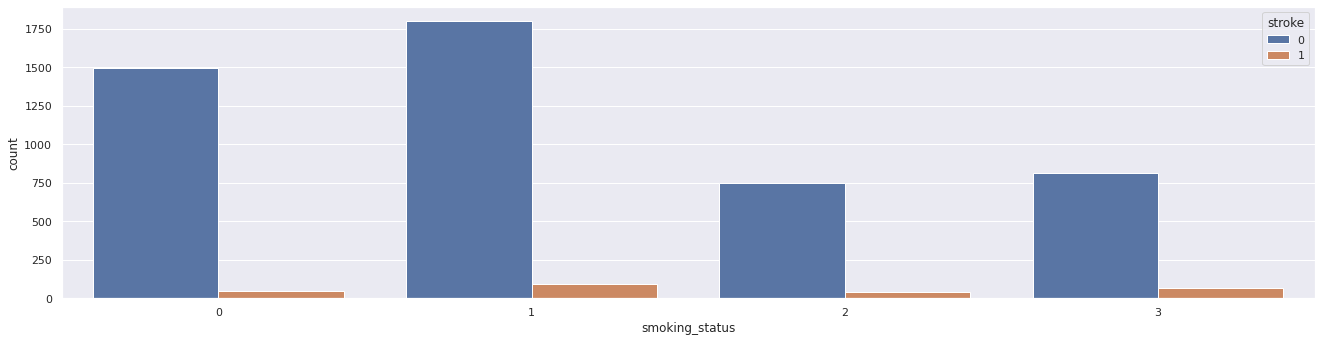

In [ ]:
countplot_targetvsfeature(df_raw,'smoking_status','stroke')


In [ ]:
#df_raw[(df_raw["stroke"]==1) & (df_raw["smoking_status"]=="Unknown")]


Correlation coefficient

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. 
The values range between -1.0 and 1.0. 

* A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. 
* A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. 
* A correlation of 0.0 shows no linear relationship between the movement of the two variables.


<AxesSubplot:>

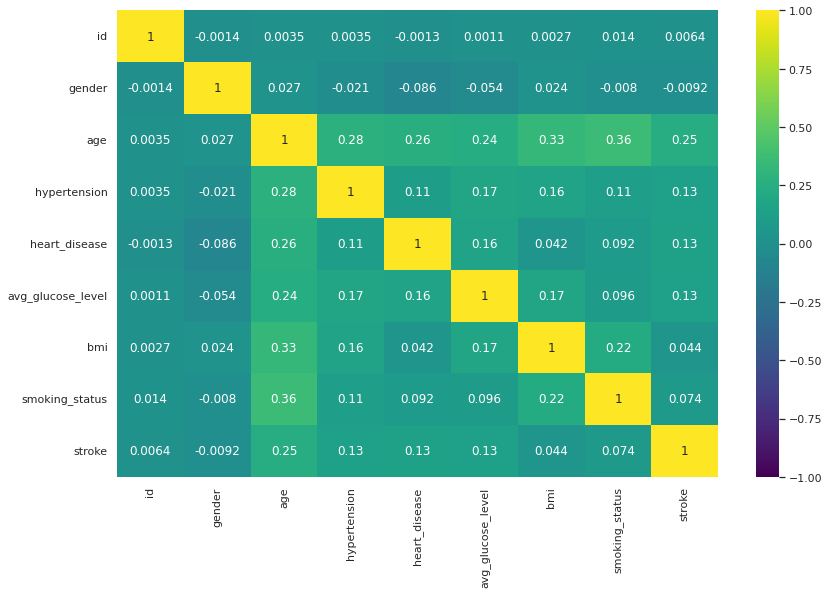

In [ ]:
#Plotting a heatmap to find relations between features

plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

## Falta interpretar la correlación

Some feature depend of or are relative to the age weak relation.



TypeError: _set_ticklabels() takes 2 positional arguments but 3 were given

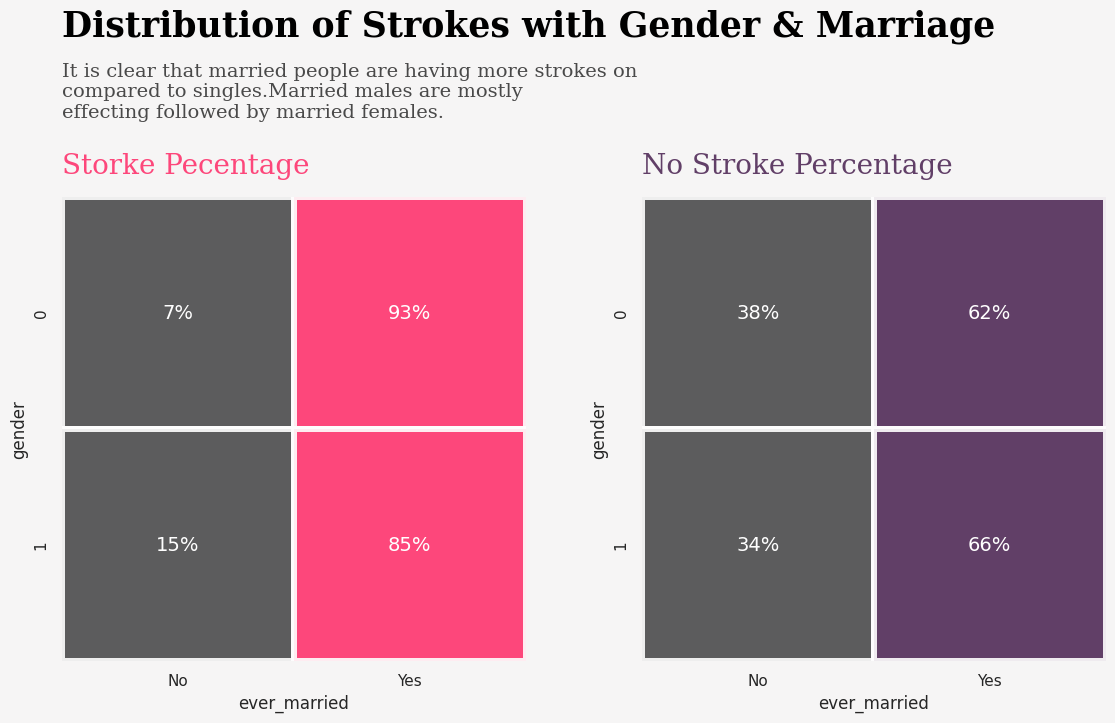

In [ ]:
import matplotlib
fig = plt.figure(figsize=(12,6),dpi = 100)
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df_raw[df_raw['stroke']==0]
stroke = df_raw[df_raw['stroke']==1]


col1 = ["#4b4b4c","#fe346e"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#4b4b4c","#512b58"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['ever_married']],normalize='index')
no_stroke = pd.crosstab(healthy['gender'],[healthy['ever_married']], normalize='index')

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke[0:-1], linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(0, -0.69, 'Distribution of Strokes with Gender & Marriage', {'font':'Serif', 'color':'black', 'weight':'bold','size':25})
ax0.text(0, -0.34, 'It is clear that married people are having more strokes on \ncompared to singles.Married males are mostly \neffecting followed by married females.', {'font':'Serif', 'color':'black','size':14}, alpha = 0.7)

ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#fe346e", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#512b58", 'size':20}, alpha =0.9)

ax0.axes.set_xticklabels(['Single', 'Married'], {'font':'serif', 'color':'black', 'size':16})
ax1.axes.set_xticklabels(['Single', 'Married'], {'font':'serif', 'color':'black', 'size':16})

ax0.axes.set_yticklabels(['Female', 'Male'], {'font':'serif', 'color':'black', 'size':16}, rotation = 0)

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axes.get_yaxis().set_visible(False)
fig.show()



## Remove features are not significative for prediction in this dataset

In [ ]:
df_raw.drop(["ever_married","work_type","Residence_type","heart_disease"],axis=1,inplace=True)

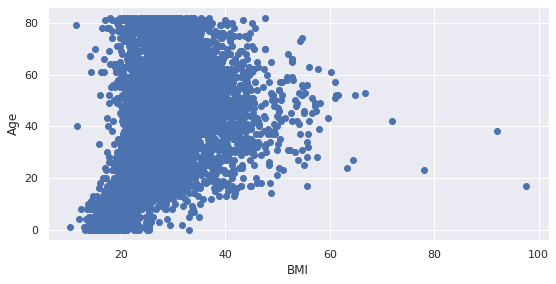

In [ ]:
plt.figure(figsize = (8, 4))
plt.scatter(x=df_raw['bmi'], y=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

**The bmi increment and also incremente the age**

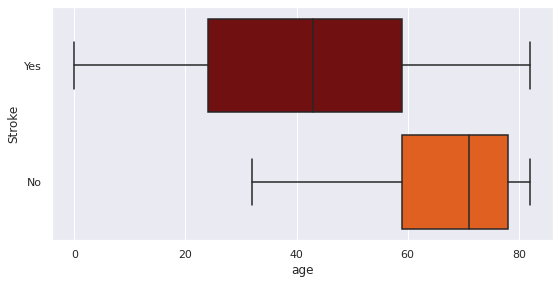

In [ ]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.stroke, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['Yes','No'])
plt.show()

**OUTLIERS**

In [ ]:
df_raw[df_raw['bmi']>60].sort_values(by=['bmi'])

,id,gender,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke,age_cat
466,1307,1,61,1,170.05,60.2,2,0,Mid Adults
270,72911,1,57,1,129.54,60.9,2,0,Mid Adults
4838,5131,1,51,0,107.72,60.9,0,0,Mid Adults
2840,65895,1,52,0,98.27,61.2,0,0,Mid Adults
3825,72784,1,52,0,118.46,61.6,2,0,Mid Adults
2764,20292,1,24,0,85.55,63.3,1,0,Adults
4188,70670,1,27,0,57.96,64.4,1,0,Adults
358,66333,0,52,0,78.40,64.8,1,0,Mid Adults
1559,37759,1,53,0,72.63,66.8,0,0,Mid Adults
544,545,0,42,0,210.48,71.9,1,0,Adults


In [ ]:
df_raw[df_raw['bmi']>80].sort_values(by=['bmi'])

,id,gender,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke,age_cat
4209,51856,0,38,1,56.90,92.0,1,0,Adults
2128,56420,0,17,1,61.67,97.6,0,0,Teens


**First conclusions:**



* Hypothesis

Does age has impact on strokes? and How is this parameter distributed?

Does body mass index and glucose levels in a person, propel a heart stroke?

* Assumption
 
Smoking can induce Stroke, is it true? 

Have Heart Disease is prone to Stroke, is it true? We can not conclude.

Hypertensión could lead to Stroke, is it true? Yes.

# PIPELINE

In [ ]:
############ YA LO HICIMOS ANTES DE TRANSFORMAR A CATEGORICAS

#def bmi_transformer_func (df):
#    df['age_bins'] = pd.cut(df['age'], bins=[35, 45, 55, 65, np.inf], labels=['35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +'], right=False)
#    df['bmi'] =df.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
#    return df


In [ ]:
#df_clean = bmi_transformer_func(df_raw)
#df_clean

In [ ]:
#preprocessor = ColumnTransformer( 
#   transformers=[
#       # Transformer name, Transformer Object and columns      
#       ('category',OrdinalEncoder(),['Residence_type','ever_married','work_type','smoking_status','gender'] ),
#       ("id_drop", "drop", ['id','age_bins'])
#    ],
    # Any other columns are ignored
#    remainder="passthrough"

#)

In [ ]:
#train_X = preprocessor.fit_transform(df_raw)
#df_raw=pd.DataFrame(train_X)
#df_raw

In [ ]:
#pipe_clf = Pipeline([
#  (
#    "FeatureEngineering",
#    ColumnTransformer( 
#          transformers=[
#              # Transformer name, Transformer Object and columns
#              ("id_drop", "drop", ['id','age_bins']), 
#              ('category',OrdinalEncoder(),['Residence_type','ever_married','work_type','smoking_status','gender'] )
#            ],
#            # Any other columns are ignored
#            remainder="passthrough"
#
#        ),
#  )
#])
#pipe_clf.fit_transform(df_raw)

**Dejamos el siguiente solamente para correr más rápido cuando estamos probando los modelos, se saca antes de entregar**

In [ ]:
""" df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')


#Impute BMI value
labels = ['0-34.9','35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +'] 
# Define the edges between bins
bins = [0,35, 45, 55, 65, np.inf]
# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
#set bmi using the mean of each range of age
df_raw['bmi_new'] = df_raw.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)

#set age as int
df_raw['age']=df_raw['age'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'].astype(int)


# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status'].astype(int)

#Remove features
df_raw.drop(["age_bins","bmi_new","id"],axis=1,inplace=True)
df_raw.drop(["ever_married","work_type","Residence_type","heart_disease"],axis=1,inplace=True)"""

**Scaler**

In [ ]:
scaler = MinMaxScaler()
#scaler =  StandardScaler()
train_scaler = scaler.fit(df_raw[['age','bmi','avg_glucose_level']])
df_raw[['age','bmi','avg_glucose_level']] = train_scaler.transform(df_raw[['age','bmi','avg_glucose_level']])



# MODEL - REGRESSION - TESTS

In [ ]:
df_guadar=df_raw.copy()

In [ ]:
#we define our labels and features
y = df_raw['stroke']
X = df_raw.drop('stroke', axis=1)
#we divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13,stratify=y)

In [ ]:
X_train

**We define function to display the results**

In [ ]:
LABELS1={"No Stroke","Stroke"}
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS1, yticklabels=LABELS1, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y,zero_division=False))


## LOGISTIC REGRESSION


Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name "logistic regression" is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.





In [ ]:
#we create a function that creates the model that we will use each time
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

#we run the model "as is"
model_logisticR = run_model(X_train, X_test, y_train, y_test)
 

In [ ]:
pred_y = model_logisticR.predict(X_test)
mostrar_resultados(y_test, pred_y)


* All are classified as non-stroke

## LOGISTIC REGRESSION BALANCED

In [ ]:
def run_model_balanced(X_train, X_test, y_train, y_test, weight={1:18,0:1}):
    clf = LogisticRegression(C=0.1,penalty='l2',random_state=1,solver="newton-cg",class_weight=weight)
    clf.fit(X_train, y_train)
    return clf
 
model_balanced = run_model_balanced(X_train, X_test, y_train, y_test) 



In [ ]:
pred_y = model_balanced.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [ ]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

# Plots the ROC curve using the sklearn methods - Good plot
y_proba = model_balanced.predict_proba(X_test)
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)



## NEARMISS

In [ ]:
us = NearMiss(n_neighbors=50, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y) 


## SAMPLING

In [ ]:
y_train_nostroke=y_train[y_train==0].sample(1600)
list(y_train_nostroke.index)
X_train_nostroke=X_train[X_train.index.isin(list(y_train_nostroke.index))]
len(X_train_nostroke)
X_train_muestra=X_train[~ X_train.index.isin(list(y_train_nostroke.index))]
y_train_muestra= y_train[~ y_train.index.isin(list(y_train_nostroke.index))]
y_train_muestra.value_counts()

from imblearn.over_sampling import RandomOverSampler


os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train_muestra, y_train_muestra)

print ("Distribution before resampling {}".format(Counter(y_train_muestra)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

y_train_final=pd.concat([y_train_nostroke, y_train_res ], ignore_index=True)
X_train_final=pd.concat([X_train_nostroke, X_train_res ], ignore_index=True)

print ("Distribution labels finals {}".format(Counter(y_train_final)))

model = run_model(X_train_final, X_test, y_train_final, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)



model_reg = run_model_balanced(X_train_final, X_test, y_train_final, y_test,weight={0:1,1:2}) 
pred_y = model_reg.predict(X_test)
mostrar_resultados(y_test, pred_y)


In [ ]:
from imblearn.over_sampling import RandomOverSampler


os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)
  

## BALANCED BAGGING WITH DESICION TREE

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc = BalancedBaggingClassifier(random_state=42,base_estimator=DecisionTreeClassifier(random_state=1,max_features=11,max_depth=11,class_weight={1:18,0:1}), n_estimators=2000)
bbc.fit(X_train,y_train) 

pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)

## DECISION TREE CLASSIFIER BASIC

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


In [ ]:
mostrar_resultados(y_test, y_pred)


## DESICION TREE CLASSIFIER BALANCED

In [ ]:
# Create the tree
tree_balance = DecisionTreeClassifier(max_depth=8, class_weight={1:18,0:1})   #
tree_balance.fit(X_train,y_train) 

#create array of probabilities
y_test_predict_proba = tree_balance.predict_proba(X_test)
y_test_predict_proba

y_pred = tree_balance.predict(X_test)
accuracy_score(y_test, y_pred)

tree_balance.get_params()

**tree.feature_importances_ is a vector with the estimated importance of each attribute**

In [ ]:
for name, importance in zip(df_raw.columns[1:], tree_balance.feature_importances_):
    print(name + ': ' + str(importance))

In [ ]:
mostrar_resultados(y_test, y_pred)


## RANDOMFOREST CLASSIFIER

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.(Random Forest by Abhishek Sharma)

In [ ]:
# Fit a Random Forest model

clf = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight={1:12,0:1})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


In [ ]:
mostrar_resultados(y_test, y_pred)

## GRADIENT BOOSTING

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is to establish target outcomes for this upcoming model to minimize errors.

Gradient Boosting trains many models in a gradual, additive and sequential manner. The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.(Boosting Algorithm by Rui Guo et al.)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


In [ ]:
mostrar_resultados(y_test, y_pred)


## Using GridSearchCV

In [ ]:
max_features = range(1,X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [4,8,10,20,30]
parameters = dict(max_features=max_features,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=[5,20,30,40],
                      min_samples_leaf=[5,10,20,40])

In [ ]:
clf_GS = GridSearchCV(DecisionTreeClassifier(random_state=41,class_weight={1:15,0:1}), parameters)
clf_GS.fit(X_train, y_train)

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
clf_GS.best_estimator_.get_params()

In [ ]:
#Improve model of tree
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_features=7,                                             
                                    min_samples_split=5,
                                    min_samples_leaf=5,
                                    max_depth = 20,
                                    random_state=0,
                                    class_weight={1:18,0:1})
tree_model.fit(X_train, y_train)
print(f'Score:{tree_model.score(X_test, y_test)}')

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], tree_model.feature_importances_):
    print(name + ': ' + str(importance))



In [ ]:
y_pred = tree_model.predict(X_test)
mostrar_resultados(y_test, y_pred)


## Using Grid to find the best Weight

In [ ]:
# define weight hyperparameter
w = [ {1:18,0:1} ] 
hyperparam_grid = {"class_weight": w , 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
# define model
lg5 = LogisticRegression(random_state=13,solver='newton-cg', max_iter=500)
# define evaluation procedure
grid = GridSearchCV(lg5,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [ ]:
lg6 = LogisticRegression(C= 0.01, random_state=13,solver='newton-cg', max_iter=500,class_weight={0: 1, 1: 18})
lg6.fit(X_train,y_train)
y_pred = lg6.predict(X_test)
mostrar_resultados(y_test, y_pred)

## K-Nearest Neighbour (KNN)

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems.

It's called a lazy learning algorithm or lazy learner because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining..

In [ ]:
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

In [ ]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

## Support Vector Machine (SVM)

Support Vector Machine (SVM) is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [ ]:
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

In [ ]:
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

## Gaussian Naive Bayes

Naive Bayes Classifiers are based on the Bayes Theorem, which one assumption taken is the strong independence assumptions between the features. These classifiers assume that the value of a particular feature is independent of the value of any other feature. In a supervised learning situation, Naive Bayes Classifiers are trained very efficiently. Naive Bayes classifiers need a small training data to estimate the parameters needed for classification. Naive Bayes Classifiers have simple design and implementation and they can applied to many real life situations.

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.

In [ ]:
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

In [ ]:
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')


In [ ]:
"""# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting'
                                  ], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})"""